**EXPLORATORY DATA ANALYSIS**

In [2]:
import numpy as np
import pandas as pd
data=pd.read_csv("Lab_Session_1_Tree_Age.csv")
data

,height,age,leaves_length,leaves_width,leaves_coverage
0,580.48,139.5,13.44,7.82,Medium
1,488.62,100.2,18.30,10.12,Medium
2,548.52,102.6,16.00,5.82,Sparse
3,604.56,120.7,18.12,7.10,Sparse
4,478.31,84.5,16.74,10.40,Sparse
...,...,...,...,...,...
295,619.87,99.2,15.34,9.38,NaN
296,481.76,68.3,15.76,5.44,NaN
297,674.64,93.2,17.76,9.78,NaN
298,670.62,121.4,16.40,5.14,Lush


In [ ]:
#put target data into data frame
target = pd.DataFrame(data)
#Lets rename the column so that we know that these values refer to the target values
target = data.rename(columns = {0: 'target'})
target.tail()
target


,height,age,leaves_length,leaves_width,leaves_coverage
0,580.48,139.5,13.44,7.82,Medium
1,488.62,100.2,18.30,10.12,Medium
2,548.52,102.6,16.00,5.82,Sparse
3,604.56,120.7,18.12,7.10,Sparse
4,478.31,84.5,16.74,10.40,Sparse
...,...,...,...,...,...
295,619.87,99.2,15.34,9.38,NaN
296,481.76,68.3,15.76,5.44,NaN
297,674.64,93.2,17.76,9.78,NaN
298,670.62,121.4,16.40,5.14,Lush


In [5]:
data.dtypes

height             float64
age                float64
leaves_length      float64
leaves_width       float64
leaves_coverage     object
dtype: object

In [6]:
#get null columns if exist
print(data.columns[data.isna().any()].tolist())
print(data.isna().sum())

#get data stat.description
data.describe(include ='all')


['leaves_length', 'leaves_coverage']
height               0
age                  0
leaves_length       20
leaves_width         0
leaves_coverage    145
dtype: int64


,height,age,leaves_length,leaves_width,leaves_coverage
count,300.000000,300.000000,280.000000,300.000000,155
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Sparse
freq,NaN,NaN,NaN,NaN,57
mean,613.379300,107.642333,16.019071,7.990000,NaN
std,80.917566,20.709928,1.716968,1.734935,NaN
min,390.910000,50.000000,13.000000,5.000000,NaN
25%,552.987500,94.200000,14.535000,6.495000,NaN
50%,607.650000,107.800000,16.050000,7.990000,NaN
75%,670.722500,121.000000,17.485000,9.485000,NaN


Terdapat data kosong yaitu 20 data kosong pada kolom leaves_length dan 145 data kosong pada kolom leaves_coverage, sehingga data  harus di lengkapi nilai kosong nya dengan mean, median atau modus pada proses imputation.

**FEATURE SELECTION**

IMPUTATION

Digunakan nilai modus, karena nilai modus merupakan nilai yang sering muncul pada data, sehingga hal ini berhubungan dengan penyebaran data apakah berdistribusi secara normal atau tidak.Sebaran data normal dicirikan dengan nilai modus tidak berbeda jauh dengan rata – rata dan median. Jika ketiga angka ini berada dalam satu nilai, bisa dipastikan data akan menyebar normal. semakin menyimpang nilai median, mean, dan modusnya, maka data semakin menyimpang kekiri atau kekanan, dengan kata lain tidak menyebar normal (jika digambarkan dengan histogram).

Jika modus lebih rendah dibandingkan nilai mean dan median, berarti banyak kelompok data yang rendah dan ada data pencilan yang tinggi yang mengganggu nilai mean nya. Sebaliknya, jika modus lebih tinggi dibandingkan nilai meannya, maka banyak kelompok data yang lebih tinggi dan terdapat data pencilan yang rendah.


In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data.iloc[:, 0:len(data.columns)] = imputer.fit_transform(data.iloc[:, 0:len(data.columns)])
data.head()

,height,age,leaves_length,leaves_width,leaves_coverage
0,580.48,139.5,13.44,7.82,Medium
1,488.62,100.2,18.30,10.12,Medium
2,548.52,102.6,16.00,5.82,Sparse
3,604.56,120.7,18.12,7.10,Sparse
4,478.31,84.5,16.74,10.40,Sparse


In [8]:
#get null columns if exist
print(data.columns[data.isna().any()].tolist())
print(data.isna().sum())

#get data stat.description
data.describe(include ='all')

[]
height             0
age                0
leaves_length      0
leaves_width       0
leaves_coverage    0
dtype: int64


,height,age,leaves_length,leaves_width,leaves_coverage
count,300.000000,300.000000,300.000000,300.000000,300
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Sparse
freq,NaN,NaN,NaN,NaN,202
mean,613.379300,107.642333,15.817800,7.990000,NaN
std,80.917566,20.709928,1.822039,1.734935,NaN
min,390.910000,50.000000,13.000000,5.000000,NaN
25%,552.987500,94.200000,14.235000,6.495000,NaN
50%,607.650000,107.800000,15.830000,7.990000,NaN
75%,670.722500,121.000000,17.385000,9.485000,NaN


Data kosong sudah tidak ada, sehingga dapat lanjut ke tahap selanjutnya.

ENCODING

In [9]:
# Label Encoder will replace every categorical variable with number. 
# Useful for replacing yes by 1, no by 0.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
temp = data.copy()
temp.iloc[:, 4] = label_encoder.fit_transform(temp.iloc[:, 4])
temp.describe()
temp.head()
temp

,height,age,leaves_length,leaves_width,leaves_coverage
0,580.48,139.5,13.44,7.82,1
1,488.62,100.2,18.30,10.12,1
2,548.52,102.6,16.00,5.82,2
3,604.56,120.7,18.12,7.10,2
4,478.31,84.5,16.74,10.40,2
...,...,...,...,...,...
295,619.87,99.2,15.34,9.38,2
296,481.76,68.3,15.76,5.44,2
297,674.64,93.2,17.76,9.78,2
298,670.62,121.4,16.40,5.14,0


In [ ]:
# One Hot Encoder will create a separate column for every variable and
# give a value of 1 where the variable is present
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
temp = data.copy()
one_hot = pd.get_dummies(temp.iloc[:, 4], prefix="coverage")
#temp.drop(temp.iloc[:, 4], inplace=True, axis=1)
temp = temp.join(one_hot)
temp.head()

,height,age,leaves_length,leaves_width,leaves_coverage,coverage_Lush,coverage_Medium,coverage_Sparse
0,580.48,139.5,13.44,7.82,Medium,0,1,0
1,488.62,100.2,18.30,10.12,Medium,0,1,0
2,548.52,102.6,16.00,5.82,Sparse,0,0,1
3,604.56,120.7,18.12,7.10,Sparse,0,0,1
4,478.31,84.5,16.74,10.40,Sparse,0,0,1


BINARIZATION

In [12]:
from sklearn.preprocessing import Binarizer
print(temp.iloc[:, 2].mean())
temp['Binarization'] = Binarizer(threshold=temp.iloc[:, 2].mean()).fit_transform(temp.iloc[:, 2].values.reshape(-1, 1))
temp.head()

15.8178


,height,age,leaves_length,leaves_width,leaves_coverage,Binarization
0,580.48,139.5,13.44,7.82,1,0.0
1,488.62,100.2,18.30,10.12,1,1.0
2,548.52,102.6,16.00,5.82,2,1.0
3,604.56,120.7,18.12,7.10,2,1.0
4,478.31,84.5,16.74,10.40,2,1.0


In [17]:
data.head()

,height,age,leaves_length,leaves_width,leaves_coverage
0,580.48,139.5,13.44,7.82,Medium
1,488.62,100.2,18.30,10.12,Medium
2,548.52,102.6,16.00,5.82,Sparse
3,604.56,120.7,18.12,7.10,Sparse
4,478.31,84.5,16.74,10.40,Sparse


In [18]:
# Label Encoder will replace every categorical variable with number. 
# Useful for replacing yes by 1, no by 0.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
datafinal = data.copy()
datafinal.iloc[:, 4] = label_encoder.fit_transform(temp.iloc[:, 4])
datafinal.describe()
datafinal.head()



,height,age,leaves_length,leaves_width,leaves_coverage
0,580.48,139.5,13.44,7.82,1
1,488.62,100.2,18.30,10.12,1
2,548.52,102.6,16.00,5.82,2
3,604.56,120.7,18.12,7.10,2
4,478.31,84.5,16.74,10.40,2


In [19]:
# age will not be used because it is not actual data
datafinal=datafinal.drop(['age'],axis=1)
datafinal.head()


,height,leaves_length,leaves_width,leaves_coverage
0,580.48,13.44,7.82,1
1,488.62,18.30,10.12,1
2,548.52,16.00,5.82,2
3,604.56,18.12,7.10,2
4,478.31,16.74,10.40,2


**FEATURE NORMALIZATION** 

Fiture normalisasi yang digunakan dalam hal ini adalah standardizing hal ini dikarenakan agar data yang tadinya tidak berdistribusi secara normal maka setelah standarisasi (dengan mengurangi nilainya dengan rata-rata dan membaginya dengan standar deviasi) akan berdistribusi secara normal dan nilai nya berada disekitar nilai rata-rata dan memiliki variansi sama dengan 1. Dalam hal ini Standardizing juga berguna untuk mengatasi adanya outlier. Sehingga gangguan dalam analisis data yang dikarenakan adanya outlier dapat diantisipasi.

In [20]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

standard_scaler = StandardScaler()

print("Standardizing")
print(standard_scaler.fit_transform(datafinal))



Standardizing
[[-0.4072573  -1.3072016  -0.09815009 -0.63167162]
 [-1.5443835   1.36459576  1.22976291 -0.63167162]
 [-0.8028871   0.10016491 -1.25285704  0.64874383]
 ...
 [ 0.75834037  1.06772939  1.03346272  0.64874383]
 [ 0.70857718  0.32006593 -1.64545741 -1.91208707]
 [-0.18901721 -0.63650349 -0.16743251  0.64874383]]


**DIMENSIONALITY REDUCTION** 

In [24]:
# get traintest and target
X = datafinal.values
y = data['age']

In [25]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 4), (60, 4), (240,), (60,))

In [26]:
# normalization
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

**PRINCIPAL COMPONENT ANALYSIS**

In [27]:
# get variance
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.28201552 0.26089826 0.23341963 0.22366658]


Hasil rasio variansi untuk 4 komponen variansi tersebut memiliki nilai yang hampir sama, dapat dikatakan ke-4 komponen tersebut memiliki pengaruh yang hampir sama, sehingga dalam hal ini tidak ada variabel independen yang direduksi. Pada praktikum kali ini, hanya akan digunakan 3 komponen saja, sehingga yang akan digunakan dalam praktikum ini adalah 3 komponen dengan nilai variansi teratas.

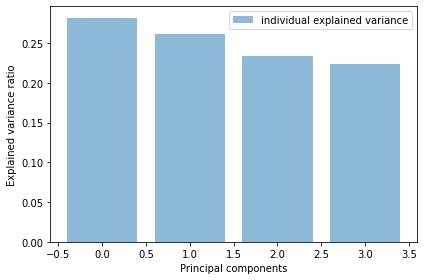

In [28]:
import matplotlib.pyplot as plt
plt.bar(range(4), explained_variance_ratio, alpha=0.5, align='center',
            label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Hasil variansi rasio juga bisa dilihat dengan melihat plot di atas, dapat dilihat bahwa perbedaan ketinggian pada ke-4 plot tersebut tidak jauh berbeda.

In [30]:
# train PCA for real
pca = PCA(n_components=3)
pca.fit_transform(X_train)
pca.transform(X_test)

PCATRAIN=pca.fit_transform(X_train)
PCATEST=pca.transform(X_test)
PCATEST

array([[ 1.07649647e-01,  2.12354307e+00, -1.27206211e+00],
       [ 6.28389356e-01,  5.51318110e-01,  3.68467615e-01],
       [-1.36828038e+00,  1.81052826e+00, -4.80325991e-01],
       [-6.64793012e-01,  8.05889731e-02, -1.22352130e+00],
       [ 2.38072374e+00,  4.25772308e-01,  1.66644820e-01],
       [-1.01982171e+00,  1.95998896e-01, -3.53851339e-02],
       [-3.72668252e-01,  9.60537146e-01, -1.04160711e+00],
       [-1.71296898e+00,  6.34965906e-01,  2.00485562e-01],
       [-1.10272382e+00,  1.68957449e+00, -6.37903983e-01],
       [ 7.12017748e-01, -1.29893258e+00, -7.77722271e-01],
       [ 4.05749390e-01,  6.29885943e-01,  1.09051473e+00],
       [-4.56561091e-01, -9.86741672e-01, -1.54905526e-01],
       [-1.77343376e+00, -8.10574942e-01,  1.06055220e+00],
       [-1.01008404e+00, -5.53788847e-01, -1.34351599e+00],
       [-1.05905189e+00,  1.16996474e+00, -4.31155567e-01],
       [ 1.34600996e+00,  1.90898748e-01, -1.15445760e+00],
       [ 2.87682622e-01,  5.72112417e-01

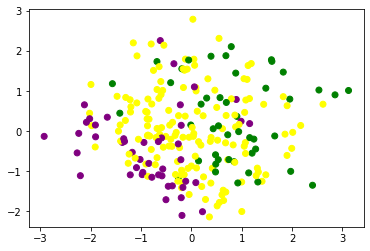

In [39]:
# plot PCA results
from matplotlib.colors import ListedColormap
newcmap = ListedColormap(['purple','yellow','green'])
#PCA 1 dan PCA2 DATA TRAINING
plt.scatter(PCATRAIN[:,0],PCATRAIN[:,1],c=y_train.values,cmap=newcmap)


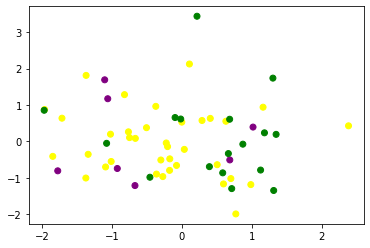

In [40]:
#PCA1 dan PCA 2 DATA TESTING
plt.scatter(PCATEST[:,0],PCATEST[:,1],c=y_test.values,cmap=newcmap)

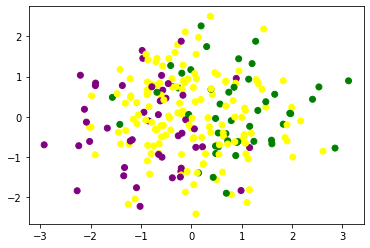

In [41]:
#PCA1 dan PCA 3 DATA TRAINING
plt.scatter(PCATRAIN[:,0],PCATRAIN[:,2],c=y_train.values,cmap=newcmap)

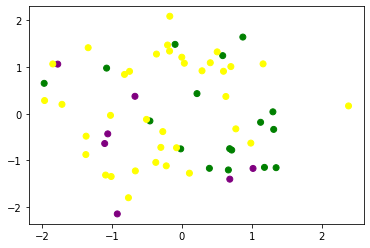

In [42]:
#PCA 1 dan PCA 3 DATA TESTING
plt.scatter(PCATEST[:,0],PCATEST[:,2],c=y_test.values,cmap=newcmap)

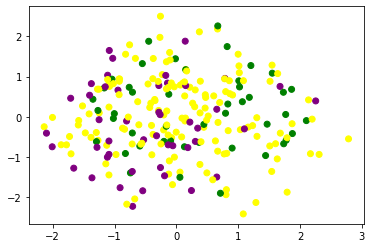

In [43]:
#PCA 2 dan PCA 3 DATA TRAINING
plt.scatter(PCATRAIN[:,1],PCATRAIN[:,2],c=y_train.values,cmap=newcmap)

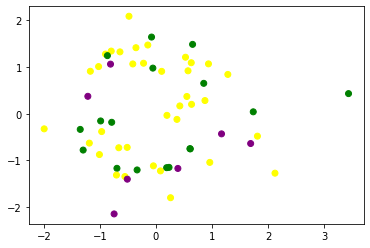

In [44]:
#PCA 2 dan PCA 3 DATA TESTING
plt.scatter(PCATEST[:,1],PCATEST[:,2],c=y_test.values,cmap=newcmap)

Pada pengujian PC1 dengan PC2, PC1 dengan PC3, PC2 dengan PC3, baik dengan data testing maupun data training menghasilkan visualisasi plot yang hampir sama yaitu sebagian besar warna kuning sebagi 'age' kelompok umur tertinggi, sementara 'age' dengan nilai lebih rendah berada berwarna hijau, dan ada sedikit yang berwarna berbeda yaitu berwarna ungu yang mengidentifikasi nilai yang jauh berbeda dengan 'age' lainnya.

In [45]:
pca.get_covariance()

array([[ 1.0041841 , -0.03823734, -0.05354378, -0.08516422],
       [-0.03823734,  1.0041841 ,  0.07303026,  0.00592954],
       [-0.05354378,  0.07303026,  1.0041841 , -0.00938751],
       [-0.08516422,  0.00592954, -0.00938751,  1.0041841 ]])